In [55]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# RECIPE 1: Getting a visual of all represented data in a column using pd.values_counts()

In [56]:
CRIME = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
CRIME

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708079,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
708080,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
708081,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
708082,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [57]:
CRIME_counts = (CRIME['Crm Cd Desc'].value_counts())
print(CRIME_counts)

VEHICLE - STOLEN                                           76059
BATTERY - SIMPLE ASSAULT                                   55851
THEFT OF IDENTITY                                          46061
BURGLARY FROM VEHICLE                                      44148
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    43562
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      2
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: Crm Cd Desc, Length: 138, dtype: int64


This allows us to more easily read the values from a given column and streamlines the data analysis process by providing both
the value and the amount of times it occurs within the column

The same information can be found by using a pivot table, though the results are presented a bit differently

In [58]:
CRIME_pivot = CRIME.pivot_table(index = ['Crm Cd Desc'], aggfunc ='size')
print(CRIME_pivot)

Crm Cd Desc
ARSON                                                        1959
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  897
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              40642
ATTEMPTED ROBBERY                                            3740
BATTERY - SIMPLE ASSAULT                                    55851
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1259
VIOLATION OF COURT ORDER                                     4906
VIOLATION OF RESTRAINING ORDER                               9024
VIOLATION OF TEMPORARY RESTRAINING ORDER                      679
WEAPONS POSSESSION/BOMBING                                     28
Length: 138, dtype: int64


# RECIPE 2: Using matplotlib to visualize a column's data

We can use visualization libraries like matplotlib to generate clear, highly customizable data visualizatons

In this case we will make the library plot the crime and the amount of instances it was committed with the condition that plots a crime if it has more than 3000 documented instances.

<AxesSubplot:>

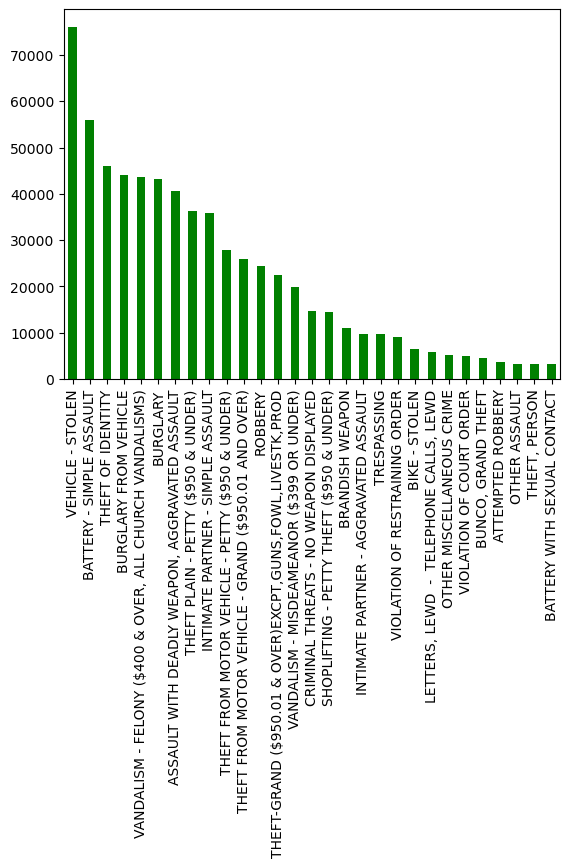

In [59]:
CRIME_counts[CRIME_counts>3000].plot(kind = "bar",color = "green")

# RECIPE 3: Getting column averages

You can use averages in really unique ways. For example, I will use the df.mean() method to find the average time that a crime
was committed.

In [60]:
CRIME_AVG_TIME = CRIME["TIME OCC"].mean()
CRIME_AVG_TIME

1334.079821038182

This number translates roughly to 1:34PM, meaning that of all documented times in which crimes were committed, this was the average!

The same methods can be used to find the median and mode, which each have their distinctive uses

In [61]:
CRIME_AVG_MEDIAN = CRIME["TIME OCC"].median()
CRIME_AVG_MEDIAN

1415.0

In [62]:
CRIME_AVG_MODE = CRIME["TIME OCC"].mode()
CRIME_AVG_MODE

0    1200
Name: TIME OCC, dtype: int64

# RECIPE 4: Creating new dataframes from existing dataframe columns and eliminating NaNs

In some cases, eliminating NaNs in data is important because they would otherwise obscure easily interpretable data.

In [63]:
CRIME_nonan=CRIME.dropna()
print(CRIME_nonan)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
51939   200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM      2030   
126190  201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
362332  210617136  10/08/2021 12:00:00 AM  10/07/2021 12:00:00 AM      1950   
371068  210209196  05/08/2021 12:00:00 AM  05/08/2021 12:00:00 AM       230   
488027  220600626  04/27/2022 12:00:00 AM  04/23/2022 12:00:00 AM      2300   
535557  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
583373  221401314  11/10/2022 12:00:00 AM  11/10/2022 12:00:00 AM      2117   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
51939      6   Hollywood          657         1     761   
126190    19     Mission         1924         1     761   
362332     6   Hollywood          659         1     121   
371068     2     Rampart          279         1     210   
488027     6   Hollywood          646         1     821   
535557    17 

In [64]:
NEW_CRIME = pd.DataFrame()

In [65]:
NEW_CRIME['new_column'] = CRIME['TIME OCC']

In [66]:
NEW_CRIME

,new_column
0,2230
1,330
2,1200
3,1730
4,415
...,...
708079,1030
708080,1800
708081,1000
708082,1630


Notice how there's 708084 rows in this dataframe which was unaffected by the df.nonan() method

In [67]:
NEW_CRIME_NONAN = pd.DataFrame()
NEW_CRIME_NONAN['new_column'] = CRIME_nonan['TIME OCC']
NEW_CRIME_NONAN

,new_column
51939,2030
126190,2135
362332,1950
371068,230
488027,2300
535557,1150
583373,2117


While the dataframe that was affected by the df.nonan() method has 7 rows, meaning that theres only 7 columns in the entire dataset that are completely filled

These methods are for exploration. They allow the data analyst to be led into different perspectives from which they can observe and further work from!